## Alexnet

AlexNet is an Image Classification model that transformed deep learning. It was introduced by Geoffrey Hinton and his team in 2012 and marked a key event in the history of deep learning, showcasing the strengths of CNN architectures and its vast applications.

### Before Alexnet


Machine learning models such as Support Vector Machines (SVMs) and shallow neural networks dominated computer vision before the development of AlexNet. Training a deep model with millions of parameters seemed impossible, we will investigate why, but first, let’s look into the limitations of the previous Machine Learning (ML) models.

* **Feature Engineering**: SVMs and simple Neural Networks (NNs) require extensive handcrafted feature engineering, which makes scaling and generalization impossible.
* **Computational Resources**: Before AlexNet, researchers primarily used CPUs to train models because they did not have direct access to GPU processing. This changed when Nvidia released the CUDA API, allowing AI software to access parallel processing using GPUs.
* **Vanishing Gradient Problem**: Deep Networks faced a vanishing gradient problem. This is where the gradients become too small during backpropagation or disappear completely.

Due to computational limitations, gradient vanishing, and a lack of large datasets to train the model on, most neural networks were shallow. These obstacles made it impossible for the model to generalize.

### Contribution of AlexNet


The AlexNet paper titled “ImageNet Classification with Deep Convolutional Neural Networks” solved the above-discussed problems.

This paper’s release deeply influenced the trajectory of deep learning. The methods and innovations introduced became a standard for training Deep Neural Networks. Here are the key innovations introduced:

* **Deep Architecture**: This model utilized deep architecture compared to any NN model released previously. It consisted of five convolutional layers followed by three fully connected layers.
* **ReLU Nonlinearity**: CNNs at that time used functions such as Tanh or Sigmoid to process information between layers. These functions slowed down the training. In contrast, ReLU (Rectified Linear Unit) made the entire process simpler and many times faster. It outputs only if the input is given to it as positive, otherwise, it outputs a zero.
* **Overlapping Pooling**: Overlapping pooling is just like regular max pooling layers, but in overlapping pooling, as the window moves across, it overlaps with the previous window. This improved the error percentage in AlexNet.
* **Use of GPU**: Before AlexNet, NNs were trained on the CPU, which made the process slow. However, the researcher of AlexNet incorporated GPUs, which accelerated computation time significantly. This proved that Deep NNs can be trained feasibly on GPUs.
* **Local Response Normalization (LRN)**: This is a process of normalizing adjacent channels in the network, which normalizes the activity of neurons within a local neighborhood.

### The AlexNet Architecture

![Alexnet architecture](./../img/alexNet-architecture.png)

### Input Layer

AlexNet takes images of the Input size of 227x227x3 RGB Pixels.

### Convolutional Layers
* **First Layer**: The first layer uses 96 kernels of size 11×11 with a stride of 4, activates them with the ReLU activation function, and then performs a Max Pooling operation.
* **Second Layer**: The second layer takes the output of the first layer as the input, with 256 kernels of size 5x5x48.
* **Third Layer**: 384 kernels of size 3x3x256. No pooling or normalization operations are performed on the third, fourth, and fifth layers.
* **Fourth Layer**: 384 kernels of size 3x3x192.
* **Fifth Layer**: 256 kernels of size 3x3x192.

### Output Layer
The output layer is a SoftMax layer that outputs probabilities of the 1000 class labels.

### Stochastic Gradient Descent
AlexNet uses stochastic gradient descent (SGD) with momentum for optimization. 

SGD is a variant of the traditional gradient descent algorithm but offers several advantages in terms of efficiency and scalability making it the go-to method for many deep-learning tasks.

* In traditional gradient descent, the gradients are computed based on the entire dataset which can be computationally expensive for large datasets.
* In Stochastic Gradient Descent, the gradient is calculated for each training example (or a small subset of training examples) rather than the entire dataset.

![SGD](./../img/stochastic.webp)

### Momentum
Momentum helps accelerate SGD and dampens fluctuations. It performs this by adding a fraction of the previous weight vector to the current weight vector. This prevents sharp updates and helps the model overcome saddle points.

Formally, the weight update rule with momentum can be written as:


Δw:=αΔw−η∇Q 

w:=w+Δw

where 

w represents the parameters, 

η is the learning rate, 

α is the momentum coefficient (between 0 and 1), and 

∇$Q_{i}$(w) is the gradient of the loss for a given sample. 

The term αΔw carries forward part of the previous update, which helps accelerate movement in consistent directions and reduces oscillations in the optimization trajectory. This concept is analogous to momentum in physics and helps the algorithm avoid getting stuck in local minima and navigate ravines more efficiently.

Momentum typically improves convergence speed and can lead to more robust training, especially in deep neural networks. A common choice for the momentum hyperparameter is around 0.9, though it can be tuned depending on the problem.

### ReLU

The paper introduce the ReLU activation function.

In simpler terms, ReLU allows positive values to pass through unchanged while setting all negative values to zero. This helps the neural network maintain the necessary complexity to learn patterns while avoiding some of the pitfalls associated with other activation functions, like the vanishing gradient problem.

The ReLU function can be described mathematically as follows:

f(x)=max(0,x)

Where:

x is the input to the neuron.

The function returns x if x is greater than 0.
If x is less than or equal to 0, the function returns 0.


This simplicity is what makes ReLU so effective in training deep neural networks, as it helps to maintain non-linearity without complicated transformations, allowing models to learn more efficiently.

If we plot the graph of ReLU activation function, it will appear like this:

![Relu](./../img/Relu-activation-function.png)

### Dropout layers

Dropout is a technique to improve the overfitting problem of Neural Network that was introduced in the paper.

The term "dropout" refers to dropping out the nodes (input and hidden layer) in a neural network. All the forward and backwards connections with a dropped node are temporarily removed, thus creating a new network architecture out of the parent network. The nodes are dropped by a dropout probability of p.

In the overfitting problem, the model learns the statistical noise. To be precise, the main motive of training is to decrease the loss function, given all the units (neurons). So in overfitting, a unit may change in a way that fixes up the mistakes of the other units. This leads to complex co-adaptations, which in turn leads to the overfitting problem because this complex co-adaptation fails to generalise on the unseen dataset.

Now, if we use dropout, it prevents these units to fix up the mistake of other units, thus preventing co-adaptation, as in every iteration the presence of a unit is highly unreliable. So by randomly dropping a few units (nodes), it forces the layers to take more or less responsibility for the input by taking a probabilistic approach.

This ensures that the model is getting generalised and hence reducing the overfitting problem.

![droput](./../img/dropout.png)

### Dataset

We will be using the CIFAR-10 dataset. The dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Here are the classes in the dataset, as well as 10 random sample images from each:

![cifar10](./../img/CIFAR-10.png)

The classes are completely mutually exclusive, with no overlap between automobiles and trucks. “Automobile” encompasses sedans, SUVs, and similar vehicles, while “Truck” refers solely to large trucks, excluding pickup trucks.

### Importing the Libraries

In [38]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms.functional as F
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import time
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
from datetime import datetime

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Loading the dataset

In [3]:
data_dir = './data'
batch_size = 64
random_seed = 42


### Transforming the data

We first transform the data according to the Alexnet in the following steps:

* `Resize` - resizes images to 227×227
* `ToTensor` converts a PIL image in [0,255] to a tensor in [0,1] (C×H×W)
* `Normalize`: shifts pixel intensities channel-wise using (x - mean) / std.

We get the mean and std values of the train and std data directly from the CIFAR-10 data which is well known, so we use those values directly, otherwise you can also calculate the mean and std of the entire train and test dataset and apply the normalise function directly on it.

In [4]:
mean = [0.4914, 0.4822, 0.4465]
std  = [0.2023, 0.1994, 0.2010]
transform = transforms.Compose([
    transforms.Resize((227,227)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])


This transform will convert the raw PIL image which is in numpy array to standardise to 227×227×3 arrays which are then converted to Tensors and normalised to be [0,1] range values.

Let's see, how the transforms happen one by one. First we will load the raw dataset.

In [5]:
raw_dataset = datasets.CIFAR10(
    root=data_dir, train=True,
    download=True, transform=None,
)

Now, we inspect one image.

In [6]:
pil_img, label = raw_dataset[0] 

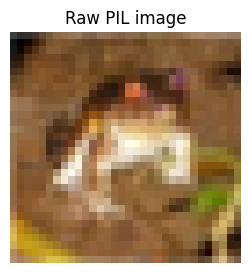

In [7]:
plt.figure(figsize=(3,3))
plt.imshow(pil_img)
plt.title("Raw PIL image")
plt.axis('off')
plt.show()

As we can see below the PIL image is 32×32 with 3 channels and each value in the tensor is uint8.

In [8]:
print("Mode/size:", pil_img.mode, pil_img.size)
raw_np = np.array(pil_img)  # H x W x C, uint8
print("Raw array dtype:", raw_np.dtype, "shape:", raw_np.shape)


Mode/size: RGB (32, 32)
Raw array dtype: uint8 shape: (32, 32, 3)


After applying the first transform the 32×32 with 3 channel PIL image gets converted into 227×227 with 3 channels.

In [10]:
transformed = transform.transforms[0]
print("Transformed:", transformed)

Transformed: Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=True)


In [11]:
resized_img = F.resize(pil_img, transformed.size, interpolation=transformed.interpolation, max_size=transformed.max_size, antialias=transformed.antialias)

In [12]:
np_resized = np.array(resized_img)
print("Type: PIL.Image, dtype:", np_resized.dtype, "shape:", np_resized.shape)

Type: PIL.Image, dtype: uint8 shape: (227, 227, 3)


After this we convert into the tensor format which converts in into 3×227×227 tensors.

In [13]:
tensor_img = F.to_tensor(resized_img)

In [14]:
print("Type: torch.Tensor, dtype:", tensor_img.dtype, "shape:", tuple(tensor_img.shape))

Type: torch.Tensor, dtype: torch.float32 shape: (3, 227, 227)


In [17]:
transformed = transform.transforms[2]
print("Transformed:", transformed)

Transformed: Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])


In [18]:
final_tensor = F.normalize(tensor_img, mean=transformed.mean, std=transformed.std)

In [19]:
print("Type: torch.Tensor, dtype:", final_tensor.dtype, "shape:", tuple(final_tensor.shape))

Type: torch.Tensor, dtype: torch.float32 shape: (3, 227, 227)


We can wrap this entire transform as well as splitting the training data into train and validation set into 2 functions and load the data directly in the format.

In [22]:
def get_train_valid_loader(data_dir,
                            batch_size,
                            random_seed,
                            valid_size=0.1,
                            shuffle=True):
    normalize = transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )

    # define transforms
    transform = transforms.Compose([
            transforms.Resize((227,227)),
            transforms.ToTensor(),
            normalize,
    ])

    # load the dataset
    train_dataset = datasets.CIFAR10(
        root=data_dir, train=True,
        download=True, transform=transform,
    )

    valid_dataset = datasets.CIFAR10(
        root=data_dir, train=True,
        download=True, transform=transform,
    )

    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    if shuffle:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, sampler=train_sampler)

    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=batch_size, sampler=valid_sampler)

    return (train_loader, valid_loader)


def get_test_loader(data_dir,
                    batch_size,
                    shuffle=True):
    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )

    # define transform
    transform = transforms.Compose([
        transforms.Resize((227,227)),
        transforms.ToTensor(),
        normalize,
    ])

    dataset = datasets.CIFAR10(
        root=data_dir, train=False,
        download=True, transform=transform,
    )

    data_loader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle
    )

    return data_loader



In [23]:
# CIFAR10 dataset 
train_loader, valid_loader = get_train_valid_loader(data_dir = './data',batch_size = 64,random_seed = 1)

test_loader = get_test_loader(data_dir = './data',
                                batch_size = 64)

## Implementing Alexnet

Note:

Useful formula for conv/pool output size per spatial dimension:


out=⌊in+2p−k/s⌋+1

where 
k=kernel, 
s=stride, 
p=padding.

In [24]:
# ----- Layer 1 -----
layer_1 = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0),
    nn.BatchNorm2d(96),
    nn.ReLU(inplace=False),
    nn.MaxPool2d(kernel_size=3, stride=2)
)

What Layer 1 does (Conv11 / s4 + BN + ReLU + Pool):

Conv2d(3→96, k=11, s=4, p=0) on (N,3,227,227) → spatial:
(227−11)/4+1=216/4+1=54+1=55 ⇒ (N, 96, 55, 55)

BatchNorm2d(96): per-channel affine normalization; stabilizes training (modern replacement for AlexNet’s LRN).

ReLU: nonlinearity.

MaxPool2d(k=3, s=2): 
(55−3)/2+1=52/2+1=26+1=27 ⇒ (N, 96, 27, 27)

Params (trainable):

Conv: 
96×(3×11×11)+96 = 96×363+96= 34,944

BN: 
2×96=192 (γ & β; running stats are buffers)

In [25]:
# ----- Layer 2 -----
layer_2 = nn.Sequential(
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
    nn.BatchNorm2d(256),
    nn.ReLU(inplace=False),
    nn.MaxPool2d(kernel_size=3, stride=2)
)


What Layer 2 does (Conv5 / s1 p2 + BN + ReLU + Pool):

Input: (N, 96, 27, 27)

Conv2d(96→256, k=5, s=1, p=2) keeps size: (N, 256, 27, 27)

MaxPool2d(k=3, s=2): (27−3)/2+1=24/2+1=12+1=13 ⇒ (N, 256, 13, 13)

Params:

Conv: 256×(96×5×5)+256=256×2400+256=614,656

BN: 2×256=512

In [26]:
# ----- Layer 3 -----
layer_3 = nn.Sequential(
    nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(384),
    nn.ReLU(inplace=False)
)


What Layer 3 does (Conv3 / s1 p1 + BN + ReLU):

Input: (N, 256, 13, 13)

Conv2d(256→384, k=3, s=1, p=1) keeps size: (N, 384, 13, 13)

Params:

Conv: 384×(256×3×3)+384=384×2304+384=885,120

BN: 2×384=768

In [27]:
# ----- Layer 4 -----
layer_4 = nn.Sequential(
    nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(384),
    nn.ReLU(inplace=False)
)


What Layer 4 does (another Conv3 / s1 p1 + BN + ReLU):

Input: (N, 384, 13, 13)

Output: (N, 384, 13, 13)

Params:

Conv: 384×(384×3×3)+384=1,327,488

BN: 2×384=768

In [28]:
# ----- Layer 5 -----
layer_5 = nn.Sequential(
    nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(inplace=False),
    nn.MaxPool2d(kernel_size=3, stride=2)
)


What Layer 5 does (Conv3 / s1 p1 + BN + ReLU + Pool):

Input: (N, 384, 13, 13)

Conv2d(384→256, k=3, s=1, p=1) keeps size: (N, 256, 13, 13)

MaxPool2d(k=3, s=2): (13−3)/2+1=10/2+1=5+1=6 ⇒ (N, 256, 6, 6)

Params:

Conv: 256×(384×3×3)+256=884,992

BN: 2×256=512

Flatten size after Layer 5 = 256×6×6=9216.

In [29]:
# ----- FC block A -----
fc_a = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(in_features=9216, out_features=4096),
    nn.ReLU(inplace=False)
)


What FC A does (Dropout + Linear 9216→4096 + ReLU):

Input: (N, 9216) after flatten

Dropout(0.5): regularization, randomly zeroes ~50% activations during training

Linear: (N, 4096)

Params: 9216×4096+4096=37,752,832

In [30]:
# ----- FC block B -----
fc_b = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(inplace=False)
)


What FC B does (Dropout + Linear 4096→4096 + ReLU):

Input/Output: (N, 4096)

Params: 4096×4096+4096=16,781,312

In [31]:
# ----- Classifier -----
fc_classifier = nn.Sequential(
    nn.Linear(4096, 10)  # num_classes
)


What the classifier does (Linear 4096→10):

Output: (N, 10) logits (for CIFAR-10)

Params: 4096×10+10=40,970

### Putting them together

In [32]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()

        # Convolutional feature extractor
        self.layer1 = layer_1
        self.layer2 = layer_2
        self.layer3 = layer_3
        self.layer4 = layer_4
        self.layer5 = layer_5

        # Fully-connected classifier head
        # Note: change the out_features of the final layer if num_classes differs
        self.fc  = fc_a
        self.fc1 = fc_b
        # replace last linear to match num_classes if needed
        self.fc2 = nn.Sequential(nn.Linear(4096, num_classes))

    def forward(self, x):
        # x: (N, 3, 227, 227)
        out = self.layer1(x)  # -> (N, 96, 27, 27)
        out = self.layer2(out)  # -> (N, 256, 13, 13)
        out = self.layer3(out)  # -> (N, 384, 13, 13)
        out = self.layer4(out)  # -> (N, 384, 13, 13)
        out = self.layer5(out)  # -> (N, 256, 6, 6)

        # Flatten
        out = out.reshape(out.size(0), -1)  # -> (N, 9216)

        # FC head
        out = self.fc(out)   # -> (N, 4096)
        out = self.fc1(out)  # -> (N, 4096)
        out = self.fc2(out)  # -> (N, num_classes)

        return out


Differences from the original Alexnet Implementation:

* **BatchNorm instead of LRN**
AlexNet used Local Response Normalization (LRN). Modern practice uses BatchNorm, which usually works better and simplifies tuning.

* **No group convolutions**
Original AlexNet split some conv layers across two GPUs using “groups”. This model uses standard (ungrouped) convs.

* **Input resolution**
AlexNet’s canonical training used 227×227 (sometimes 224×224 in modern code—both fine with adjusted first conv). Your design expects 227×227 so that the flatten size becomes exactly 9216.

* **Framework conveniences**
PyTorch nn.Sequential makes the pipeline concise; ReLUs are standard; inplace not required here.

### Setting up hyperparameters

In [40]:
num_classes = 10
num_epochs = 20
batch_size = 64
learning_rate = 0.005
total_param = 623786344

model = AlexNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

# Train the model
total_step = len(train_loader)

In [39]:
# Create TensorBoard log directory
log_dir = f"runs/alexnet_cifar10_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
writer = SummaryWriter(log_dir=log_dir)

# Metrics storage for Plotly visualizations
training_metrics = {
    'epoch': [],
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'learning_rate': [],
    'epoch_time': [],
    'gradient_norm': [],
    'weight_norm': []
}

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

def calculate_accuracy(outputs, labels):
    """Calculate accuracy from outputs and labels"""
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

def get_gradient_norm(model):
    """Calculate the norm of gradients"""
    total_norm = 0
    for p in model.parameters():
        if p.grad is not None:
            param_norm = p.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
    return total_norm ** (1. / 2)

def get_weight_norm(model):
    """Calculate the norm of weights"""
    total_norm = 0
    for p in model.parameters():
        param_norm = p.data.norm(2)
        total_norm += param_norm.item() ** 2
    return total_norm ** (1. / 2)

print(f"TensorBoard logs will be saved to: {log_dir}")
print("To view TensorBoard, run: tensorboard --logdir=runs")

TensorBoard logs will be saved to: runs/alexnet_cifar10_20251005_200136
To view TensorBoard, run: tensorboard --logdir=runs


In [ ]:
total_step = len(train_loader)
global_step = 0

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    
    # Training phase
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total_samples = 0
    
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        
        # Calculate gradient norm before optimizer step
        grad_norm = get_gradient_norm(model)
        
        optimizer.step()
        
        # Statistics
        running_loss += loss.item() * images.size(0)
        running_corrects += (torch.max(outputs, 1)[1] == labels).sum().item()
        total_samples += labels.size(0)
        
        # Log to TensorBoard every 100 steps
        if (i + 1) % 100 == 0:
            writer.add_scalar('Training/Loss_Step', loss.item(), global_step)
            writer.add_scalar('Training/Accuracy_Step', 
                            calculate_accuracy(outputs, labels), global_step)
            writer.add_scalar('Training/Gradient_Norm', grad_norm, global_step)
            writer.add_scalar('Training/Weight_Norm', get_weight_norm(model), global_step)
            
            # Log learning rate
            current_lr = optimizer.param_groups[0]['lr']
            writer.add_scalar('Training/Learning_Rate', current_lr, global_step)
            
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], '
                  f'Loss: {loss.item():.4f}, Acc: {calculate_accuracy(outputs, labels):.4f}')
        
        global_step += 1

    # Calculate epoch training metrics
    epoch_train_loss = running_loss / total_samples
    epoch_train_acc = running_corrects / total_samples
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    val_running_corrects = 0
    val_total_samples = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_running_corrects += (predicted == labels).sum().item()
            val_total_samples += labels.size(0)
            
            # Store predictions for confusion matrix
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate epoch validation metrics
    epoch_val_loss = val_running_loss / val_total_samples
    epoch_val_acc = val_running_corrects / val_total_samples
    epoch_time = time.time() - epoch_start_time
    
    # Store metrics for Plotly visualization
    training_metrics['epoch'].append(epoch + 1)
    training_metrics['train_loss'].append(epoch_train_loss)
    training_metrics['train_acc'].append(epoch_train_acc)
    training_metrics['val_loss'].append(epoch_val_loss)
    training_metrics['val_acc'].append(epoch_val_acc)
    training_metrics['learning_rate'].append(optimizer.param_groups[0]['lr'])
    training_metrics['epoch_time'].append(epoch_time)
    training_metrics['gradient_norm'].append(grad_norm)
    training_metrics['weight_norm'].append(get_weight_norm(model))
    
    # Log epoch metrics to TensorBoard
    writer.add_scalar('Epoch/Train_Loss', epoch_train_loss, epoch)
    writer.add_scalar('Epoch/Train_Accuracy', epoch_train_acc, epoch)
    writer.add_scalar('Epoch/Val_Loss', epoch_val_loss, epoch)
    writer.add_scalar('Epoch/Val_Accuracy', epoch_val_acc, epoch)
    writer.add_scalar('Epoch/Time', epoch_time, epoch)
    
    # Log confusion matrix every 5 epochs
    if (epoch + 1) % 5 == 0:
        cm = confusion_matrix(all_labels, all_predictions)
        fig_cm = px.imshow(cm, 
                          x=class_names, 
                          y=class_names,
                          color_continuous_scale='Blues',
                          title=f'Confusion Matrix - Epoch {epoch+1}')
        writer.add_figure(f'Confusion_Matrix/Epoch_{epoch+1}', fig_cm.to_image(format="png"), epoch)
    
    print(f'Epoch [{epoch+1}/{num_epochs}] - '
          f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}, '
          f'Time: {epoch_time:.2f}s')
    
# Log model graph
dummy_input = torch.randn(1, 3, 227, 227).to(device)
writer.add_graph(model, dummy_input)

# Close TensorBoard writer
writer.close()
print(f"Training completed! TensorBoard logs saved to: {log_dir}")

In [ ]:
# Advanced Plotly Visualizations

def create_training_dashboard():
    """Create comprehensive training dashboard with multiple plots"""
    
    # Create subplot figure
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=('Loss Curves', 'Accuracy Curves', 
                       'Learning Rate Schedule', 'Training Time per Epoch',
                       'Gradient & Weight Norms', 'Loss vs Accuracy Correlation'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": True}, {"secondary_y": False}]]
    )
    
    epochs = training_metrics['epoch']
    
    # 1. Loss Curves
    fig.add_trace(
        go.Scatter(x=epochs, y=training_metrics['train_loss'], 
                  name='Training Loss', line=dict(color='red')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=epochs, y=training_metrics['val_loss'], 
                  name='Validation Loss', line=dict(color='blue')),
        row=1, col=1
    )
    
    # 2. Accuracy Curves
    fig.add_trace(
        go.Scatter(x=epochs, y=training_metrics['train_acc'], 
                  name='Training Accuracy', line=dict(color='green')),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(x=epochs, y=training_metrics['val_acc'], 
                  name='Validation Accuracy', line=dict(color='orange')),
        row=1, col=2
    )
    
    # 3. Learning Rate Schedule
    fig.add_trace(
        go.Scatter(x=epochs, y=training_metrics['learning_rate'], 
                  name='Learning Rate', line=dict(color='purple')),
        row=2, col=1
    )
    
    # 4. Training Time per Epoch
    fig.add_trace(
        go.Bar(x=epochs, y=training_metrics['epoch_time'], 
               name='Epoch Time', marker_color='lightblue'),
        row=2, col=2
    )
    
    # 5. Gradient & Weight Norms
    fig.add_trace(
        go.Scatter(x=epochs, y=training_metrics['gradient_norm'], 
                  name='Gradient Norm', line=dict(color='red')),
        row=3, col=1
    )
    fig.add_trace(
        go.Scatter(x=epochs, y=training_metrics['weight_norm'], 
                  name='Weight Norm', line=dict(color='blue')),
        row=3, col=1, secondary_y=True
    )
    
    # 6. Loss vs Accuracy Correlation
    fig.add_trace(
        go.Scatter(x=training_metrics['val_loss'], y=training_metrics['val_acc'],
                  mode='markers+lines', name='Val Loss vs Acc',
                  marker=dict(size=8, color=epochs, colorscale='Viridis'),
                  text=[f'Epoch {e}' for e in epochs]),
        row=3, col=2
    )
    
    # Update layout
    fig.update_layout(
        height=1200,
        title_text="AlexNet Training Dashboard",
        showlegend=True
    )
    
    # Update y-axis titles
    fig.update_yaxes(title_text="Loss", row=1, col=1)
    fig.update_yaxes(title_text="Accuracy", row=1, col=2)
    fig.update_yaxes(title_text="Learning Rate", row=2, col=1)
    fig.update_yaxes(title_text="Time (seconds)", row=2, col=2)
    fig.update_yaxes(title_text="Gradient Norm", row=3, col=1)
    fig.update_yaxes(title_text="Weight Norm", row=3, col=1, secondary_y=True)
    fig.update_yaxes(title_text="Validation Accuracy", row=3, col=2)
    fig.update_xaxes(title_text="Validation Loss", row=3, col=2)
    
    return fig

# Create and display the dashboard
dashboard_fig = create_training_dashboard()
dashboard_fig.show()

In [ ]:
# Advanced Performance Analysis
def create_performance_insights():
    """Create advanced performance analysis plots"""
    
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Overfitting Analysis', 'Training Efficiency',
                       'Convergence Rate', 'Performance Metrics Heatmap')
    )
    
    epochs = training_metrics['epoch']
    
    # 1. Overfitting Analysis (Gap between train and val)
    train_val_gap = [t - v for t, v in zip(training_metrics['train_acc'], training_metrics['val_acc'])]
    
    fig.add_trace(
        go.Scatter(x=epochs, y=train_val_gap, 
                  name='Train-Val Gap', line=dict(color='red'),
                  fill='tozeroy', fillcolor='rgba(255,0,0,0.2)'),
        row=1, col=1
    )
    
    # 2. Training Efficiency (Accuracy improvement per time)
    acc_improvement = [training_metrics['val_acc'][i] - training_metrics['val_acc'][0] 
                      for i in range(len(training_metrics['val_acc']))]
    efficiency = [acc / time if time > 0 else 0 
                 for acc, time in zip(acc_improvement, training_metrics['epoch_time'])]
    
    fig.add_trace(
        go.Scatter(x=epochs, y=efficiency, 
                  name='Training Efficiency', line=dict(color='green')),
        row=1, col=2
    )
    
    # 3. Convergence Rate (Loss reduction rate)
    loss_reduction = [training_metrics['val_loss'][0] - loss 
                     for loss in training_metrics['val_loss']]
    
    fig.add_trace(
        go.Scatter(x=epochs, y=loss_reduction, 
                  name='Loss Reduction', line=dict(color='blue')),
        row=2, col=1
    )
    
    # 4. Performance Metrics Correlation Heatmap
    import pandas as pd
    metrics_df = pd.DataFrame(training_metrics)
    correlation_matrix = metrics_df[['train_loss', 'val_loss', 'train_acc', 'val_acc', 
                                   'gradient_norm', 'weight_norm', 'epoch_time']].corr()
    
    fig.add_trace(
        go.Heatmap(z=correlation_matrix.values,
                  x=correlation_matrix.columns,
                  y=correlation_matrix.columns,
                  colorscale='RdBu',
                  text=correlation_matrix.values,
                  texttemplate='%{text:.2f}',
                  textfont={"size": 10}),
        row=2, col=2
    )
    
    fig.update_layout(
        height=800,
        title_text="Advanced Performance Analysis",
        showlegend=True
    )
    
    # Update axis titles
    fig.update_yaxes(title_text="Accuracy Gap", row=1, col=1)
    fig.update_yaxes(title_text="Acc/Time", row=1, col=2)
    fig.update_yaxes(title_text="Loss Reduction", row=2, col=1)
    
    return fig

# Create and display performance insights
performance_fig = create_performance_insights()
performance_fig.show()

In [ ]:
# Final Model Evaluation and Visualization
def evaluate_final_model():
    """Comprehensive final model evaluation"""
    
    model.eval()
    all_predictions = []
    all_labels = []
    class_correct = [0] * 10
    class_total = [0] * 10
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(labels.size(0)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    
    # Calculate per-class accuracy
    class_accuracies = [100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0 
                       for i in range(10)]
    
    # Create final evaluation plots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Final Confusion Matrix', 'Per-Class Accuracy',
                       'Training Progress Summary', 'Model Performance Radar'),
        specs=[[{"type": "heatmap"}, {"type": "bar"}],
               [{"type": "scatter"}, {"type": "scatterpolar"}]]
    )
    
    # 1. Final Confusion Matrix
    cm = confusion_matrix(all_labels, all_predictions)
    fig.add_trace(
        go.Heatmap(z=cm, x=class_names, y=class_names,
                  colorscale='Blues', text=cm, texttemplate='%{text}'),
        row=1, col=1
    )
    
    # 2. Per-Class Accuracy
    fig.add_trace(
        go.Bar(x=class_names, y=class_accuracies,
               marker_color='lightgreen',
               text=[f'{acc:.1f}%' for acc in class_accuracies],
               textposition='auto'),
        row=1, col=2
    )
    
    # 3. Training Progress Summary
    fig.add_trace(
        go.Scatter(x=training_metrics['epoch'], y=training_metrics['train_loss'],
                  name='Train Loss', line=dict(color='red')),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=training_metrics['epoch'], y=training_metrics['val_loss'],
                  name='Val Loss', line=dict(color='blue')),
        row=2, col=1
    )
    
    # 4. Model Performance Radar Chart
    final_metrics = {
        'Final Val Accuracy': training_metrics['val_acc'][-1] * 100,
        'Training Stability': 100 - (max(training_metrics['val_loss']) - min(training_metrics['val_loss'])) * 50,
        'Convergence Speed': (1 - training_metrics['val_loss'][-1] / training_metrics['val_loss'][0]) * 100,
        'Generalization': 100 - abs(training_metrics['train_acc'][-1] - training_metrics['val_acc'][-1]) * 100,
        'Parameter Efficiency': min(100, (training_metrics['val_acc'][-1] * 1000000) / total_params)
    }
    
    fig.add_trace(
        go.Scatterpolar(r=list(final_metrics.values()),
                       theta=list(final_metrics.keys()),
                       fill='toself',
                       name='Model Performance'),
        row=2, col=2
    )
    
    fig.update_layout(
        height=1000,
        title_text="Final Model Evaluation Dashboard"
    )
    
    return fig, class_accuracies

# Create final evaluation
final_fig, class_accs = evaluate_final_model()
final_fig.show()

# Print final statistics
print("\n=== FINAL MODEL EVALUATION ===")
print(f"Overall Test Accuracy: {100 * sum(class_accs) / len(class_accs):.2f}%")
print("\nPer-Class Accuracies:")
for i, (class_name, acc) in enumerate(zip(class_names, class_accs)):
    print(f"{class_name:12}: {acc:.2f}%")

In [ ]:
# Save Training Results and Generate Report
import json
from datetime import datetime

def save_training_report():
    """Save comprehensive training report"""
    
    report = {
        'model_info': {
            'architecture': 'AlexNet',
            'dataset': 'CIFAR-10',
            'total_parameters': total_param,
            # 'trainable_parameters': trainable_params
        },
        'training_config': {
            'num_epochs': num_epochs,
            'batch_size': batch_size,
            'learning_rate': learning_rate,
            'optimizer': 'SGD',
            'momentum': 0.9,
            'weight_decay': 0.005
        },
        'final_metrics': {
            'final_train_accuracy': float(training_metrics['train_acc'][-1]),
            'final_val_accuracy': float(training_metrics['val_acc'][-1]),
            'final_train_loss': float(training_metrics['train_loss'][-1]),
            'final_val_loss': float(training_metrics['val_loss'][-1]),
            'best_val_accuracy': float(max(training_metrics['val_acc'])),
            'best_val_epoch': int(training_metrics['val_acc'].index(max(training_metrics['val_acc'])) + 1)
        },
        'training_metrics': training_metrics,
        'timestamp': datetime.now().isoformat()
    }
    
    # Save report
    report_path = f"alexnet_training_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
    with open(report_path, 'w') as f:
        json.dump(report, f, indent=2)
    
    print(f"Training report saved to: {report_path}")
    return report_path

# Save the report
report_path = save_training_report()

print("\n=== TRAINING COMPLETE ===")
print(f"TensorBoard logs: {log_dir}")
print(f"Training report: {report_path}")
print("\nTo view TensorBoard:")
print(f"tensorboard --logdir={log_dir}")